Лабораторная работа 3

Тема: Метод главных компонент

Вариант 6 (датасет flight_delays)

Методом главных компонент построить два новых признака для описания объектов из датасета задания 2 и кластеризовать данные по этим двум признакам на два кластера (любым методом). Сравнить качество кластеризации  из задания 2 и из этого задания.

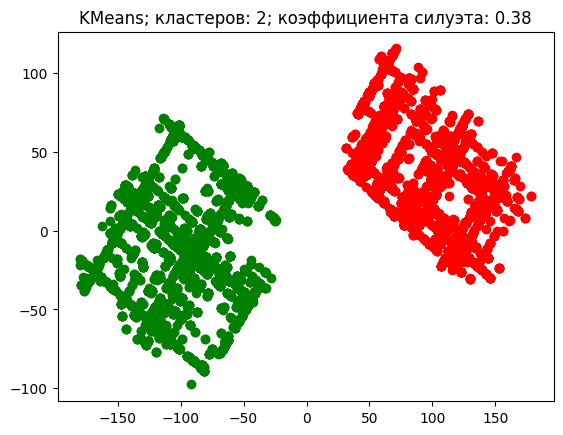

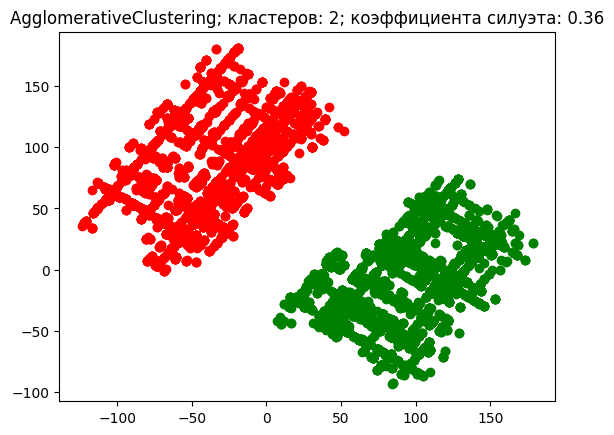

In [5]:
import pandas as pd
import numpy as np
import datetime
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def clasterize_with_pca(clusters_amount, ClastirizeMethod):
  df = pd.read_csv('flight_delays.csv', sep=',')[:20000]
  cats = ["Month","DayofMonth","DayOfWeek", "UniqueCarrier","Origin","Dest","dep_delayed_15min"]

  for cat in cats:
    df[f'{cat}_cat'] = pd.factorize(df[cat], sort=True)[0]

  # Выбираем категориальные и числовые данные
  numer = df[["DepTime","Distance"]]
  cater = df[[f"{cat}_cat" for cat in cats]]

  # Подготавливаем числовые данные
  scaler = StandardScaler()
  numer = pd.DataFrame(scaler.fit_transform(numer))
  numer.columns = ["DepTime_Scaled", "Distance_Scaled"]

  # Сливаем подготовленные данные в новый датасет
  X = pd.concat([numer, cater], axis=1, join='inner')

  # Подготавливаем PCA
  pca = PCA(n_components=2)

  # Получаем два новых признака с использованием PCA
  pca_props = pd.DataFrame(pca.fit_transform(X))

  # Переназначаем названия колонок для полученных
  pca_props.columns = ["PCA 1", "PCA 2"]

  clasterizer = ClastirizeMethod(n_clusters=5)
  clusters = clasterizer.fit_predict(pca_props)

  labels = clasterizer.labels_
  silhouette_avg = silhouette_score(X, labels)

  X["Cluster"] = clusters
  X = pd.concat([X, df, pca_props], axis=1, join='inner')

  plotX = pd.DataFrame(np.array(X))
  plotX.columns = X.columns

  colors = ["red", "green", "blue", "black", "yellow", "cyan"]

  for i in range(0, clusters_amount):
    cluster = plotX[plotX["Cluster"] == i]
    plt.scatter(
        x = cluster["PCA 1"],
        y = cluster["PCA 2"],
        c = colors[i % len(colors)],
    )

  plt.title(f"{ClastirizeMethod.__name__}; кластеров: {clusters_amount}; коэффициента силуэта: {silhouette_avg:.2f}")

  plt.show()

clasterize_with_pca(2, KMeans)
clasterize_with_pca(2, AgglomerativeClustering)

Вывод: в предыдущей лабораторной работе при использовании кластеризации необходимо было учесть множество свойств, что сильно увеличивало время работы алгоритма кластеризации, вследствие чего было принято решение использовать ограниченную выборку в 500 элементов. Метод главных компонент сократил количество свойств до 2, что позволило существенно увеличить выборку и повысить качество кластеризации (коэффициент силуэта вырос до 0.38 и 0.36).